In [1]:
import numpy as np
from skimage import io
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt

# 将实验图像和本底图像转换到频域
experiment_fft = fftshift(fft2(experiment_image))
background_fft = fftshift(fft2(background_image))

# 去除本底的频谱
result_fft = experiment_fft - background_fft

# 将结果转换回空间域
result_image_freq = np.clip(np.abs(ifft2(ifftshift(result_fft))), 0, 255).astype(np.uint8)

# 显示结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("experiment_image")
plt.imshow(experiment_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("background_image")
plt.imshow(background_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("denoised_image (frequency domain)")
plt.imshow(result_image_freq, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# 保存结果图像
io.imsave('result_image_freq.png', result_image_freq)


NameError: name 'experiment_image' is not defined

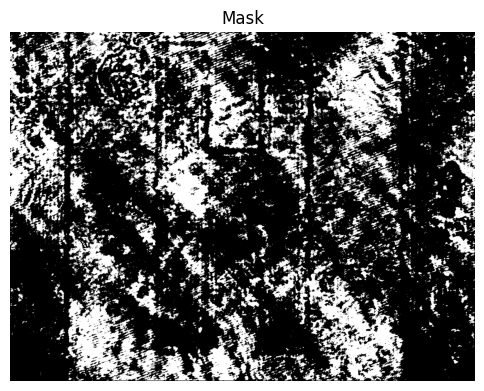

In [2]:
experiment_image_path = 'Edge_H.BMP'  # 实验图像路径
background_image_path = 'BackGround.BMP'  # 背景图像路径
# 读取实验图像和背景图像
experiment_image = io.imread(experiment_image_path, as_gray=True)
background_image = io.imread(background_image_path, as_gray=True)
# 确保图像是灰度图像
if experiment_image.ndim == 3:
    experiment_image = np.mean(experiment_image, axis=2)
if background_image.ndim == 3:
    background_image = np.mean(background_image, axis=2)
# 将图像转换为浮点数
experiment_image = experiment_image.astype(np.float32)
background_image = background_image.astype(np.float32)
# 归一化图像
experiment_image = (experiment_image - np.min(experiment_image)) / (np.max(experiment_image) - np.min(experiment_image))
background_image = (background_image - np.min(background_image)) / (np.max(background_image) - np.min(background_image))
# 计算背景图像的均值
background_mean = np.mean(background_image)
# 计算背景图像的标准差
background_std = np.std(background_image)
# 计算阈值
threshold = background_mean + 2 * background_std

# 计算掩模
mask = (experiment_image > background_image).astype(np.uint8)

# 显示掩模
plt.figure(figsize=(6, 6))
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# 保存掩模图像
io.imsave('edge_mask.png', mask * 255)  # 将掩模值扩展到0-255范围以保存为图像

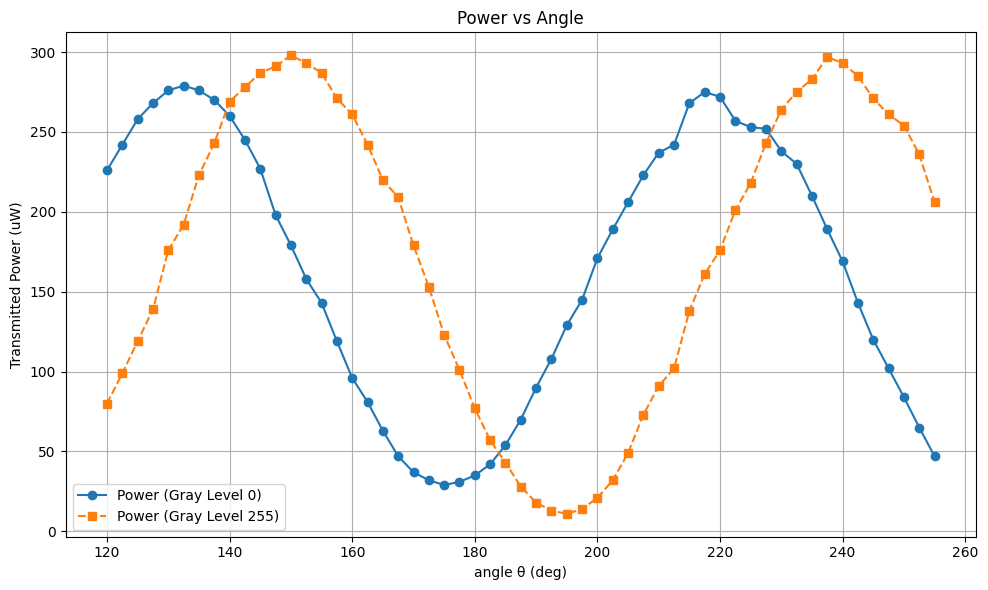

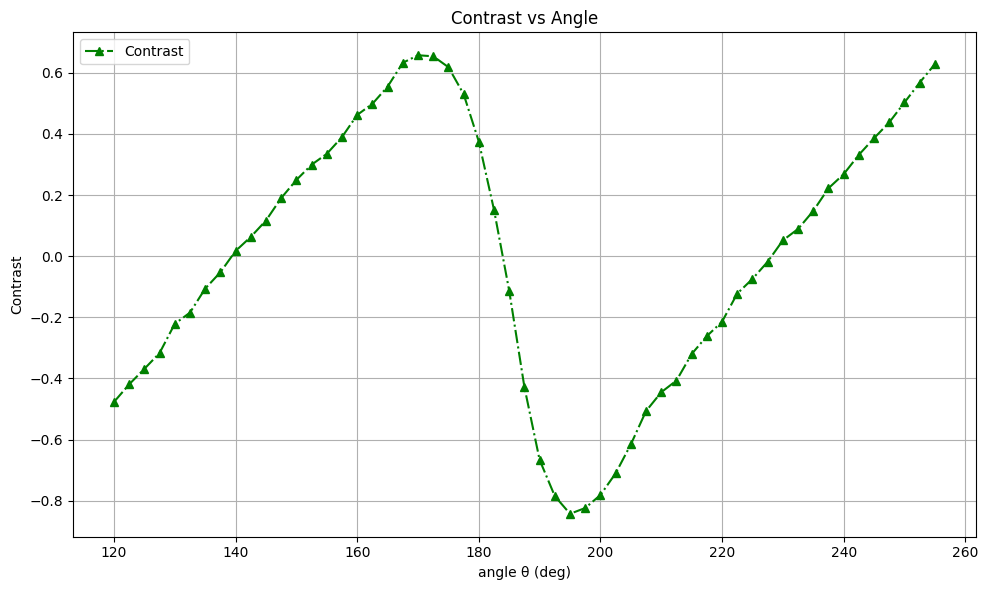

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import io


# 原始数据字符串
# 注意：原始数据中，数据行（从第二行开始）的行首有一个制表符。
# pandas.read_csv 会正确处理这种情况，将第一列（对应表头“灰度值 0”）解析为空值或 NaN。
data_string = """灰度值 0	θ(deg)	0_I_out(uW)	255_I_out(uW)	con
	120	226	80	-0.477124183
	122.5	242	99	-0.419354839
	125	258	119	-0.368700265
	127.5	268	139	-0.316953317
	130	276	176	-0.221238938
	132.5	279	192	-0.184713376
	135	276	223	-0.106212425
	137.5	270	243	-0.052631579
	140	260	269	0.017013233
	142.5	245	278	0.063097514
	145	227	287	0.116731518
	147.5	198	291	0.190184049
	150	179	298	0.249475891
	152.5	158	293	0.299334812
	155	143	287	0.334883721
	157.5	119	271	0.38974359
	160	96	261	0.462184874
	162.5	81	242	0.498452012
	165	63	220	0.554770318
	167.5	47	209	0.6328125
	170	37	179	0.657407407
	172.5	32	153	0.654054054
	175	29	123	0.618421053
	177.5	31	101	0.53030303
	180	35	77	0.375
	182.5	42	57	0.151515152
	185	54	43	-0.113402062
	187.5	70	28	-0.428571429
	190	90	18	-0.666666667
	192.5	108	13	-0.785123967
	195	129	11	-0.842857143
	197.5	145	14	-0.823899371
	200	171	21	-0.78125
	202.5	189	32	-0.71040724
	205	206	49	-0.615686275
	207.5	223	73	-0.506756757
	210	237	91	-0.445121951
	212.5	242	102	-0.406976744
	215	268	138	-0.320197044
	217.5	275	161	-0.26146789
	220	272	176	-0.214285714
	222.5	257	201	-0.122270742
	225	253	218	-0.074309979
	227.5	252	243	-0.018181818
	230	238	264	0.051792829
	232.5	230	275	0.089108911
	235	210	283	0.148073022
	237.5	189	297	0.222222222
	240	169	293	0.268398268
	242.5	143	285	0.331775701
	245	120	271	0.386189258
	247.5	102	261	0.438016529
	250	84	254	0.50295858
	252.5	65	236	0.568106312
	255	47	206	0.628458498"""

# 使用 io.StringIO 将字符串数据模拟成文件供 pandas 读取
data_io = io.StringIO(data_string)

# 读取数据，使用制表符作为分隔符，第一行为表头
df = pd.read_csv(data_io, sep='\t')

# 提取绘图所需的数据列
# 'θ(deg)' 是角度列
# '0_I_out(uW)' 是灰度值0时的输出功率
# '255_I_out(uW)' 是灰度值255时的输出功率
# 'con' 是对比度列
theta = df['θ(deg)']
power_gray0 = df['0_I_out(uW)']
power_gray255 = df['255_I_out(uW)']
contrast = df['con']

# --- 绘制第一幅图：透过功率和角度的关系 ---
plt.figure(figsize=(10, 6))
plt.plot(theta, power_gray0, marker='o', linestyle='-', label='Power (Gray Level 0)')
plt.plot(theta, power_gray255, marker='s', linestyle='--', label='Power (Gray Level 255)')

plt.title('Power vs Angle')
plt.xlabel('angle θ (deg)')
plt.ylabel('Transmitted Power (uW)')
plt.legend() # 显示图例
plt.grid(True) # 显示网格
plt.tight_layout() # 自动调整子图参数，使之填充整个图像区域
plt.show()


# --- 绘制第二幅图：对比度和角度的关系 ---
plt.figure(figsize=(10, 6))
plt.plot(theta, contrast, marker='^', linestyle='-.', color='green', label='Contrast')

plt.title('Contrast vs Angle')
plt.xlabel('angle θ (deg)')
plt.ylabel('Contrast')
plt.legend() # 显示图例
plt.grid(True) # 显示网格
plt.tight_layout() # 自动调整子图参数
plt.show()

# 打印DataFrame的头部和信息，以供检查（可选）
# print("数据概览:")
# print(df.head())
# print("\n数据信息:")
# print(df.info())
# print("\n第一列（'灰度值 0'）的值，应为 NaN:")
# print(df['灰度值 0'].unique())

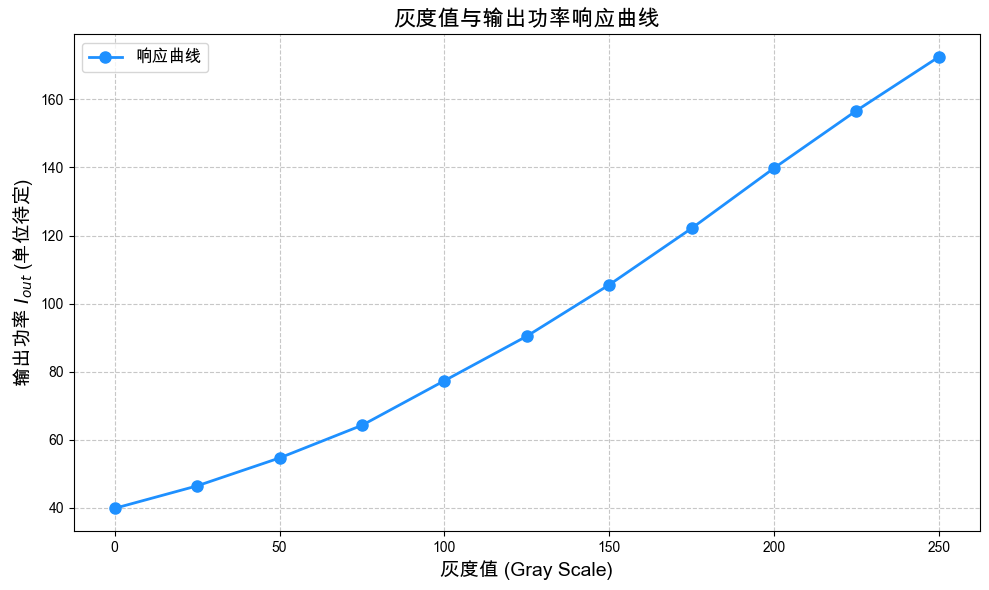

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# 设置 matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # macOS 系统
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 原始数据字符串
# 注意：原始数据中，数据行（从第二行开始）的行首有一个制表符。
# "响应数据" 是一个描述性标题，实际的列名是 gray_scale 和 I_out
data_string = """响应数据	gray_scale	I_out
	0	39.8
	25	46.4
	50	54.6
	75	64.2
	100	77.3
	125	90.4
	150	105.5
	175	122.1
	200	139.8
	225	156.7
	250	172.5"""

# 使用 io.StringIO 将字符串数据模拟成文件供 pandas 读取
data_io = io.StringIO(data_string)

# 读取数据，使用制表符作为分隔符
# 第一行将被用作列名。由于第一行是 "响应数据\tgray_scale\tI_out"，
# pandas 会创建一个名为 "响应数据" 的列（其值在数据行中为空，因为数据行以制表符开头），
# 以及我们需要的 'gray_scale' 和 'I_out' 列。
df = pd.read_csv(data_io, sep='\t')

# 提取绘图所需的数据列
gray_scale = df['gray_scale']
i_out = df['I_out']

# --- 绘制响应曲线 ---
plt.figure(figsize=(10, 6)) # 设置图形大小

plt.plot(gray_scale, i_out, marker='o', linestyle='-', color='dodgerblue', linewidth=2, markersize=8, label='响应曲线')

# 添加标题和标签
plt.title('灰度值与输出功率响应曲线', fontsize=16)
plt.xlabel('灰度值 (Gray Scale)', fontsize=14)
plt.ylabel('输出功率 $I_{out}$ (单位待定)', fontsize=14) # I_out 的单位未知，这里先写“单位待定”

# 添加图例
plt.legend(fontsize=12)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 优化布局
plt.tight_layout()

# 显示图形
plt.show()

# 打印DataFrame的头部和信息，以供检查（可选）
# print("数据概览:")
# print(df.head())
# print("\n数据信息:")
# print(df.info())


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# 定义三角函数拟合模型：A * cos(w * x + phi) + B
def cos_func(x, A, w, phi, B):
    return A * np.cos(w * np.deg2rad(x) + phi) + B

# 拟合灰度值0的数据
popt0, _ = curve_fit(cos_func, theta, power_gray0, p0=[100, 1, 0, 150])
A0, w0, phi0, B0 = popt0

# 拟合灰度值255的数据
popt255, _ = curve_fit(cos_func, theta, power_gray255, p0=[100, 1, 0, 150])
A255, w255, phi255, B255 = popt255

# 计算相位差（以弧度为单位）
phase_diff_rad = np.abs(phi0 - phi255)
# 转换为角度
phase_diff_deg = np.rad2deg(phase_diff_rad)

print(f"灰度值0拟合参数: A={A0:.2f}, w={w0:.4f}, phi={phi0:.4f} rad, B={B0:.2f}")
print(f"灰度值255拟合参数: A={A255:.2f}, w={w255:.4f}, phi={phi255:.4f} rad, B={B255:.2f}")
print(f"相位差: {phase_diff_rad:.4f} 弧度, {phase_diff_deg:.2f} 度")

# 可视化拟合结果
import matplotlib.pyplot as plt

theta_fit = np.linspace(theta.min(), theta.max(), 500)
fit0 = cos_func(theta_fit, *popt0)
fit255 = cos_func(theta_fit, *popt255)

plt.figure(figsize=(10, 6))
plt.plot(theta, power_gray0, 'o', label='Power (Gray 0) Data')
plt.plot(theta_fit, fit0, '-', label='Fit (Gray 0)')
plt.plot(theta, power_gray255, 's', label='Power (Gray 255) Data')
plt.plot(theta_fit, fit255, '--', label='Fit (Gray 255)')
plt.xlabel('θ (deg)')
plt.ylabel('Transmitted Power (uW)')
plt.title('Cosine Fit for Power vs Angle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import io

# 原始数据字符串 (与之前相同)
data_string = """灰度值 0	θ(deg)	0_I_out(uW)	255_I_out(uW)	con
	120	226	80	-0.477124183
	122.5	242	99	-0.419354839
	125	258	119	-0.368700265
	127.5	268	139	-0.316953317
	130	276	176	-0.221238938
	132.5	279	192	-0.184713376
	135	276	223	-0.106212425
	137.5	270	243	-0.052631579
	140	260	269	0.017013233
	142.5	245	278	0.063097514
	145	227	287	0.116731518
	147.5	198	291	0.190184049
	150	179	298	0.249475891
	152.5	158	293	0.299334812
	155	143	287	0.334883721
	157.5	119	271	0.38974359
	160	96	261	0.462184874
	162.5	81	242	0.498452012
	165	63	220	0.554770318
	167.5	47	209	0.6328125
	170	37	179	0.657407407
	172.5	32	153	0.654054054
	175	29	123	0.618421053
	177.5	31	101	0.53030303
	180	35	77	0.375
	182.5	42	57	0.151515152
	185	54	43	-0.113402062
	187.5	70	28	-0.428571429
	190	90	18	-0.666666667
	192.5	108	13	-0.785123967
	195	129	11	-0.842857143
	197.5	145	14	-0.823899371
	200	171	21	-0.78125
	202.5	189	32	-0.71040724
	205	206	49	-0.615686275
	207.5	223	73	-0.506756757
	210	237	91	-0.445121951
	212.5	242	102	-0.406976744
	215	268	138	-0.320197044
	217.5	275	161	-0.26146789
	220	272	176	-0.214285714
	222.5	257	201	-0.122270742
	225	253	218	-0.074309979
	227.5	252	243	-0.018181818
	230	238	264	0.051792829
	232.5	230	275	0.089108911
	235	210	283	0.148073022
	237.5	189	297	0.222222222
	240	169	293	0.268398268
	242.5	143	285	0.331775701
	245	120	271	0.386189258
	247.5	102	261	0.438016529
	250	84	254	0.50295858
	252.5	65	236	0.568106312
	255	47	206	0.628458498"""

data_io = io.StringIO(data_string)
df = pd.read_csv(data_io, sep='\t')

theta_col = df['θ(deg)']
power0_col = df['0_I_out(uW)']
power255_col = df['255_I_out(uW)']

def generate_latex_table(theta_data, power_data, grayscale_value, caption_text):
    """
    Generates a LaTeX table string with 6 columns (3 pairs of theta and power).
    """
    latex_string = "\\begin{table}[htbp]\n"
    latex_string += "\\centering\n"
    latex_string += f"\\caption{{{caption_text}}}\n"
    latex_string += "\\label{tab:gray" + str(grayscale_value) + "}\n"
    # Using 'c' for centered columns. Adjust if needed (e.g., 'r' for right-align numbers)
    latex_string += "\\begin{tabular}{|c|c|c|c|c|c|}\n"
    latex_string += "\\hline\n"
    # Header row: 3 pairs of (Theta, Power)
    header_pair = "$\\theta$ (\\textdegree) & $I_{out}$ ($\\mu$W)"
    latex_string += f"{header_pair} & {header_pair} & {header_pair} \\\\\n"
    latex_string += "\\hline\n"

    num_entries = len(theta_data)
    entries_per_row = 3 # Each entry is a (theta, power) pair

    for i in range(0, num_entries, entries_per_row):
        row_items = []
        for j in range(entries_per_row):
            idx = i + j
            if idx < num_entries:
                row_items.append(f"{theta_data.iloc[idx]}")
                row_items.append(f"{power_data.iloc[idx]}")
            else:
                # Add empty cells if data runs out for a full 6-column row
                row_items.append("")
                row_items.append("")
        latex_string += " & ".join(row_items) + " \\\\\n"
        if idx < num_entries -1 : # Avoid double hline at the end if last row is full
             latex_string += "\\hline\n"


    if not (num_entries > 0 and num_entries % entries_per_row == 0):
         latex_string += "\\hline\n" # Ensure last line if not perfectly divisible

    latex_string += "\\end{tabular}\n"
    latex_string += "\\end{table}\n"
    return latex_string

# Generate LaTeX for Grayscale 0
latex_table_gray0 = generate_latex_table(
    theta_col,
    power0_col,
    0,
    "透过功率与角度的关系 (灰度值 0)"
)

# Generate LaTeX for Grayscale 255
latex_table_gray255 = generate_latex_table(
    theta_col,
    power255_col,
    255,
    "透过功率与角度的关系 (灰度值 255)"
)

print("--- LaTeX Table for Grayscale 0 ---")
print(latex_table_gray0)
print("\n--- LaTeX Table for Grayscale 255 ---")
print(latex_table_gray255)